# Objective: Analysis of Movie Profitability across Release Months

To determine profitability across release seasons, aiming to guide our company’s strategy in Releasing films during the seasons which more likely to generate more profits.

### 1. Loading and exploring the Data (tn.movie_budgets.csv)

In [129]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import statsmodels.api as sm
import numpy as np
from datetime import datetime

In [130]:
# Read the csv file into a Dataframe
movie_budgets_df = pd.read_csv('../../DataSets/tn.movie_budgets.csv')

# View the first 5 rows of the dataset
movie_budgets_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [131]:
#View information about the coulmns in the dataframe
movie_budgets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


## Data Pre-processing

In [132]:
# Extract month  from release_date for seasonality analysis
movie_budgets_df['release_date'] = pd.to_datetime(movie_budgets_df['release_date'], format="%b %d, %Y", errors='coerce')
movie_budgets_df['release_month'] = movie_budgets_df['release_date'].dt.month

In [133]:
# Generate the unique available months
movie_budgets_df['release_month'].unique()

array([12,  5,  6,  4, 11,  7,  3,  2, 10,  8,  9,  1], dtype=int64)

In [134]:
# Data Type Concersion finacial columns from object to float
financial_columns = ['production_budget', 'domestic_gross', 'worldwide_gross']
for col in financial_columns:
    movie_budgets_df[col] = movie_budgets_df[col].replace('[\$,]', '', regex=True).astype(float)

movie_budgets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 5782 non-null   int64         
 1   release_date       5782 non-null   datetime64[ns]
 2   movie              5782 non-null   object        
 3   production_budget  5782 non-null   float64       
 4   domestic_gross     5782 non-null   float64       
 5   worldwide_gross    5782 non-null   float64       
 6   release_month      5782 non-null   int64         
dtypes: datetime64[ns](1), float64(3), int64(2), object(1)
memory usage: 316.3+ KB


## Analyzing Profitability by Month

Profit = (Total_gross - production budget)

In [135]:
# Calculate Total gross
movie_budgets_df['total_gross'] = movie_budgets_df['worldwide_gross'] + movie_budgets_df['domestic_gross']
# Calculate profit
movie_budgets_df['profit'] = (movie_budgets_df['total_gross'] - movie_budgets_df['production_budget'])

movie_budgets_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_month,total_gross,profit
0,1,2009-12-18,Avatar,425000000.0,760507625.0,2.776345e+09,12,3.536853e+09,3.111853e+09
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,5,1.286728e+09,8.761278e+08
2,3,2019-06-07,Dark Phoenix,350000000.0,42762350.0,1.497624e+08,6,1.925247e+08,-1.574753e+08
3,4,2015-05-01,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,5,1.862020e+09,1.531420e+09
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,12,1.936903e+09,1.619903e+09


In [136]:
# Calculate average profit and total_gross by month
monthly_seasonality = movie_budgets_df.groupby('release_month').agg(
    avg_total_gross=('total_gross', 'mean'),
    avg_profit=('profit', 'mean')
).sort_values(by='avg_profit', ascending=False).reset_index()

monthly_seasonality


,release_month,avg_total_gross,avg_profit
0,5,2.289660e+08,1.818308e+08
1,6,2.083509e+08,1.652518e+08
2,7,2.016917e+08,1.591455e+08
3,11,1.939228e+08,1.513227e+08
4,12,1.477940e+08,1.145424e+08
5,3,1.192064e+08,8.842428e+07
6,2,1.069592e+08,7.891276e+07
7,8,9.314662e+07,6.759052e+07
8,4,8.724866e+07,6.344583e+07
9,10,7.388806e+07,5.349540e+07


## Visualizations 
The visuals showing Average Profit and Average Total Gross

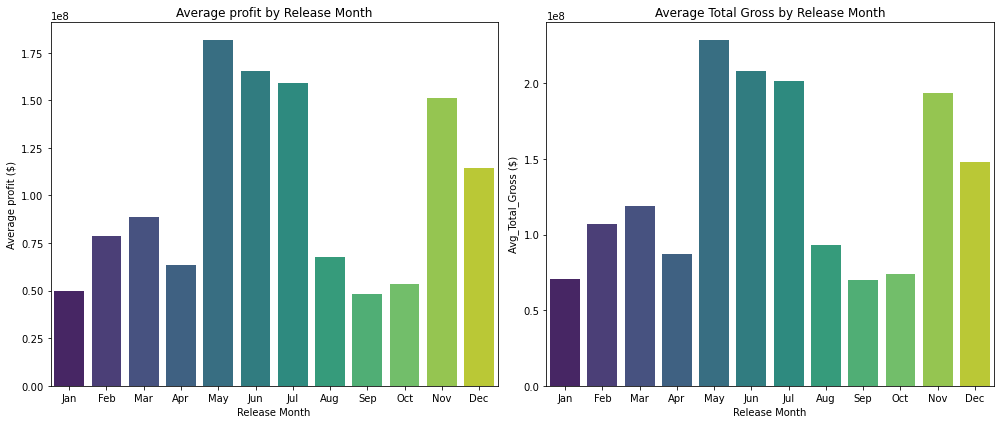

In [137]:
fig, axs = plt.subplots(1, 2, figsize=(14,6))

# Average Profit by Month
sns.barplot(data=monthly_seasonality, x=monthly_seasonality['release_month'], y=monthly_seasonality['avg_profit'], palette='viridis', ax=axs[0])
axs[0].set_title("Average profit by Release Month")
axs[0].set_xlabel("Release Month")
axs[0].set_ylabel("Average profit ($)")
axs[0].set_xticks(range(12))
axs[0].set_xticklabels([
    'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'
])

# Average Total Gross by Month
sns.barplot(data=monthly_seasonality, x=monthly_seasonality['release_month'], y=monthly_seasonality['avg_total_gross'], palette='viridis', ax=axs[1])
axs[1].set_title("Average Total Gross by Release Month")
axs[1].set_xlabel("Release Month")
axs[1].set_ylabel("Avg_Total_Gross ($)")
axs[1].set_xticks(range(0,12)) 
axs[1].set_xticklabels([
    'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'
])

plt.tight_layout()
plt.show()


#### Observations
1. From the Barchat, it is clear that Most profitable months to release are during May, June, July, November and December. This is particularly because these are times of the year are both summer and Holiday Seasons where many people have alot of time to watch movies. The Least Profitable months being Jan and September.

## Statistical Analysis


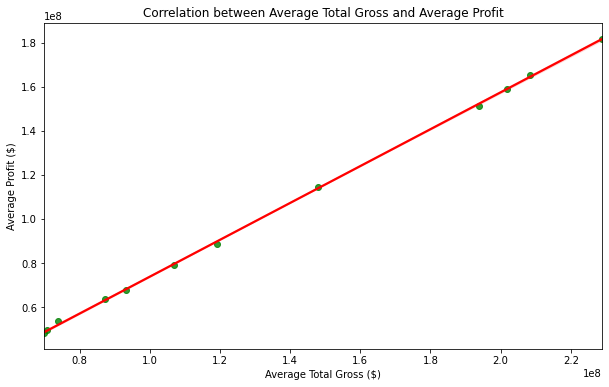

In [138]:
plt.figure(figsize=(10, 6))

# Scatter plot with regression line
sns.regplot(data=monthly_seasonality, x="avg_total_gross", y="avg_profit", marker="o", color="green", line_kws={"color": "red"})
plt.title("Correlation between Average Total Gross and Average Profit")
plt.xlabel("Average Total Gross ($)")
plt.ylabel("Average Profit ($)")

plt.show()

### **Observation**
- Positive trend of the scatter plot, indicates that as the avg_total_gross increases, the avg_profit also tends to increase.

- The regression line indicates a strong positive linear relationship, where higher total gross amounts are generally associated with higher profits.

In [139]:
#Pearson Correlation and p-value Analysis

#Null_Hypothesis = There is no linear relationship
#Alternative_Hypothesis = There exits a linear relationship 

#Calculate pearson correlation and p-value
correlation, p_value = pearsonr(monthly_seasonality['avg_total_gross'], monthly_seasonality['avg_profit'])

correlation, p_value

(0.9998499405185896, 5.990445879349743e-19)

### Observations
- With Correlation coefeficient(r) = 0.9998, this is very close to +1, indicating a positive linear relationship between avg_total_gross and avg_profit. This means that as avg_total gross increases, avg_profit consistently increases at a proportional rate.
- p_value = 5.99*10e-19, which is way below the common significance thresholds of 0.05 or 0.01. This means there exits a statistical significance allowing us to reject the null hypothesis that there is no linear relationship between avg_total_gross and avg_profit 

# Summary and Recommendations
1. The studio should consider focusing on high-grossing months (May, June, July,November and December) as these months could yield the greatest profits due to their strong correlation